### Loading CIFAR-10 Dataset

In [67]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


### Preprocessing the Data

In [68]:
from tensorflow.keras.utils import to_categorical

# Normalizing the image data to 0-1 range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training labels shape: (50000, 10)
Test labels shape: (10000, 10)


### Data Augmentation

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)
datagen.fit(x_train)

### Building the CNN Model

In [70]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import tensorflow as tf

model = tf.keras.Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,249,994 (12.40 MB)

 Trainable params: 3,249,098 (12.39 MB)

 Non-trainable params: 896 (3.50 KB)

In [71]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras import regularizers
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = Sequential()

# # First Convolutional Block
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Second Convolutional Block
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Flattening feature maps
# model.add(Flatten())

# # Fully Connected Layers
# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.5))

# # Output Layer
# model.add(Dense(10, activation='softmax'))

# model.summary()

### Compiling the Model

In [72]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Training the Model

In [75]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 566s 446ms/step - accuracy: 0.2629 - loss: 2.2035 - val_accuracy: 0.3406 - val_loss: 2.2300
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 370s 296ms/step - accuracy: 0.4809 - loss: 1.4464 - val_accuracy: 0.5637 - val_loss: 1.2595
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 370s 296ms/step - accuracy: 0.5958 - loss: 1.1718 - val_accuracy: 0.6613 - val_loss: 0.9753
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 365s 292ms/step - accuracy: 0.6507 - loss: 1.0160 - val_accuracy: 0.6660 - val_loss: 0.9497
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 353s 282ms/step - accuracy: 0.6967 - loss: 0.8930 - val_accuracy: 0.6699 - val_loss: 0.9568
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 396s 317ms/step - accuracy: 0.7153 - loss: 0.8401 - val_accuracy: 0.7382 - val_loss: 0.7854
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 644s 515ms/step - accuracy: 0.7344 - loss: 0.7895 - val_accuracy: 0.7265 - val_loss: 0.8280
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 581s 465ms/s

### Evaluating the Model

In [76]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Loss: {test_loss}")
print(f"\nTest Accuracy: {round(test_accuracy, 2)*100}%")

313/313 - 25s - 78ms/step - accuracy: 0.8482 - loss: 0.5402

Test Loss: 0.5401719212532043

Test Accuracy: 85.0%


### Plotting

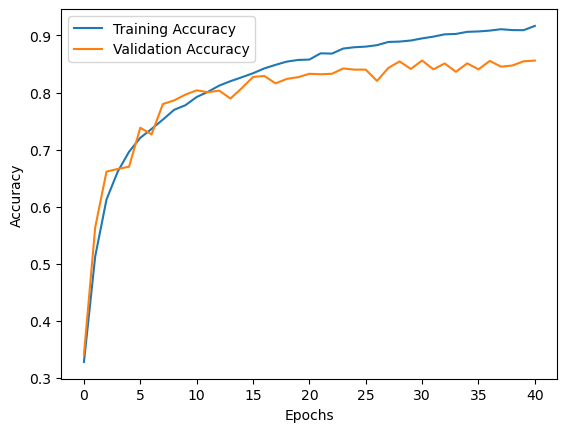

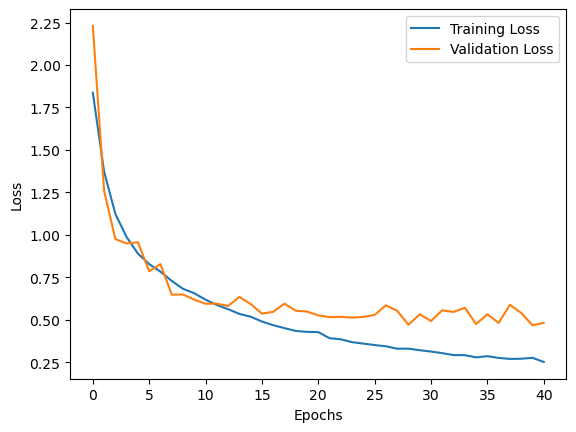

In [77]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Saving the Model

In [78]:
model.save("cifar10_model.h5")
print("Model saved successfully")

Model saved successfully
